### Reading the Cleaned Dataset

In [2]:
# Library to read the file
import pandas as pd

dataframe = pd.read_csv('D:/neu/NLP/Capstone_Project-Sentiment_Analysis-master/Capstone_Project-Sentiment_Analysis-master/Dataset/cleaned_data_review.csv')

In [3]:
# Sample observations
dataframe.head(3)

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time,clean_text,tokens
0,A6VPK7X53QNAQ,B0000CC64W,5.0,If I had to choose only one product to take ca...,5,0,good,2009-06-18,choose one product take care face rest life wo...,"['choose', 'one', 'product', 'take', 'care', '..."
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,Makes my skin lovely and smooth As a woman nea...,2,0,good,2013-01-18,make skin lovely smooth woman near need help g...,"['make', 'skin', 'lovely', 'smooth', 'woman', ..."
2,A1V1EP514B5H7Y,B0000CC64W,5.0,Works well at a reasonable price I've used thi...,0,0,good,2011-11-29,work well reasonable price use regenerating se...,"['work', 'well', 'reasonable', 'price', 'use',..."


## Data Preprocessing

Converting good and bad into 1 and 0 respectively to use while modeling.
Spliting the features and labels

In [4]:
dataframe['rating_class'] = dataframe['rating_class'].apply(lambda x: 0 if x == 'bad' else 1)

In [5]:
# Splitting the Data Set into Train and Test Sets
X = dataframe['clean_text']
y = dataframe['rating_class']

**Splitting Dataset into Train and Test Set**

We split our data in to a training set used to fit our model and a test set to see how well it generalizes to unseen data. 

Using train_test_split from sklearn to split our data into 

In [6]:
# Splitting Dataset into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(21432,)
Test Set Shape		:(7144,)


**Confusion Matrix Plot Function**

In [8]:
# Libraries for matrix manuplations
import numpy as np
import itertools

# Libraries for Visualizatins
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.summer):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 18)
    plt.yticks(tick_marks, classes, fontsize = 18)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [9]:
from sklearn.metrics import confusion_matrix
def show_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

**Functions for Algorithms Comparison**

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [ ]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

## Bag of Words CountVectorizer 

We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the **Bag of Words** or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

**"CountVectorizer"** implements both tokenization and occurrence counting in a single class. 

In [10]:
# Create the word vector with CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [11]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 23829


In [12]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [13]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

,___________________________________________________________i,_____________________________________________i,________________________________________product,_____________________addendum,_______update,a_e,aa,aaa,aaaaaaaaaahhhhhhhhhhh,aaaaahhhhhhh,...,zoo,zoolander,zoom,zurich,zwill,zwillig,zwilling,zync,zz,zzzzap
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Creating a function for applying different algorithms**

In [14]:
def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

### Logistic Regression with CountVectorizer

In [18]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
from sklearn.linear_model import LogisticRegression
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
cv_logreg_y_pred = y_pred

f1 score: 0.9071351878140128


**Classification Report**

In [19]:
# Compute and print the classification report
print(classification_report(y_test, cv_logreg_y_pred))

              precision    recall  f1-score   support

           0       0.37      0.68      0.48       514
           1       0.97      0.91      0.94      6630

    accuracy                           0.89      7144
   macro avg       0.67      0.79      0.71      7144
weighted avg       0.93      0.89      0.91      7144



**Confusion Matrix**

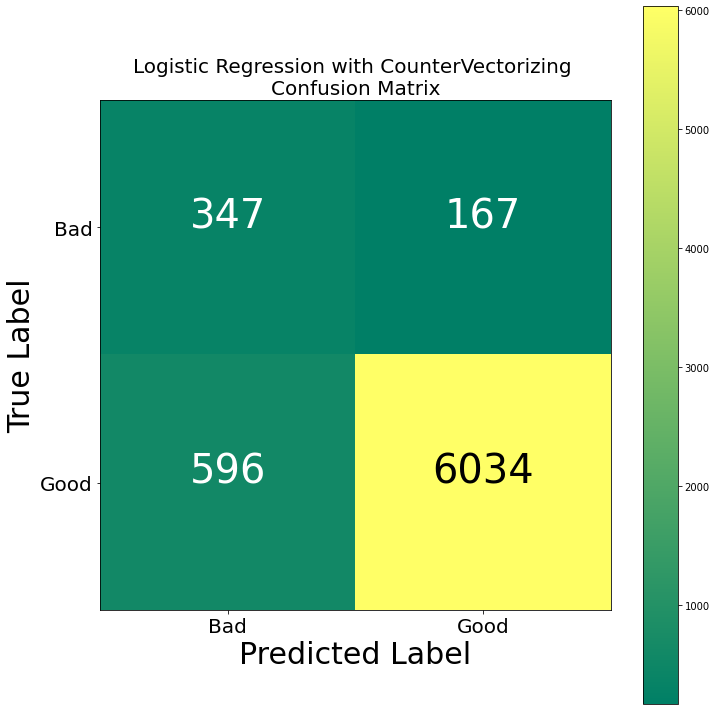

In [20]:
# Print confusion matrix for logistic regression with countvectorizer
show_confusion_matrix(cv_logreg_y_pred, "Logistic Regression")

### Random Forest with CountVectorizer

In [21]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
from sklearn.ensemble import RandomForestClassifier
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42))

# Assign y_pred to a variable for further process
cv_rf_y_pred = y_pred

f1 score: 0.8954694030343426


**Classification Report**

In [22]:
# Compute and print the classification report
print(classification_report(y_test, cv_rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       514
           1       0.93      1.00      0.96      6630

    accuracy                           0.93      7144
   macro avg       0.96      0.51      0.49      7144
weighted avg       0.93      0.93      0.90      7144



**Confusion Matrix**

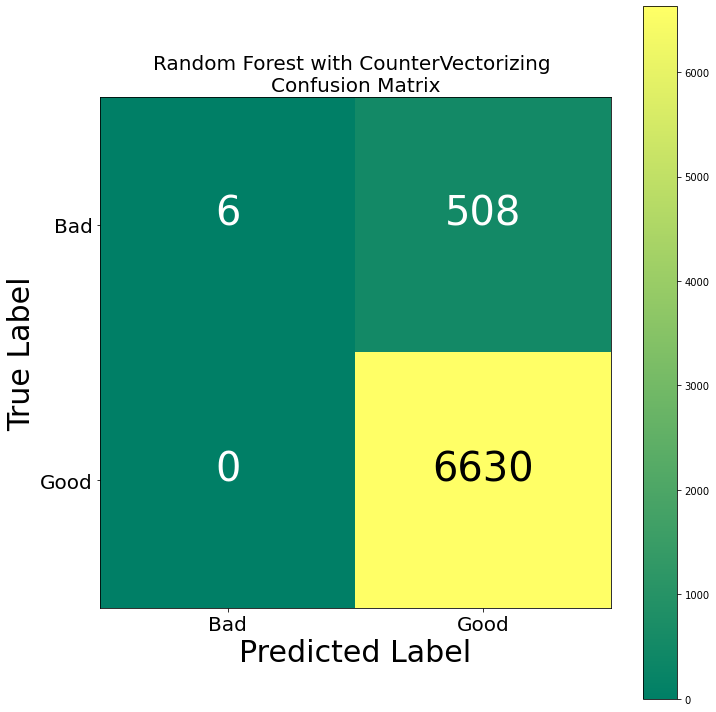

In [23]:
# Print confusion matrix for random forest classifier with countVectorizer
show_confusion_matrix(cv_rf_y_pred, "Random Forest")

### Naive Bayes with CountVectorizer 

In [24]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
from sklearn.naive_bayes import MultinomialNB
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
cv_nb_y_pred = y_pred

f1 score: 0.9182942726099028


**Classification Report**

In [25]:
# Compute and print the classification report
print(classification_report(y_test, cv_nb_y_pred))

              precision    recall  f1-score   support

           0       0.54      0.25      0.34       514
           1       0.94      0.98      0.96      6630

    accuracy                           0.93      7144
   macro avg       0.74      0.61      0.65      7144
weighted avg       0.91      0.93      0.92      7144



**Confusion Matrix**

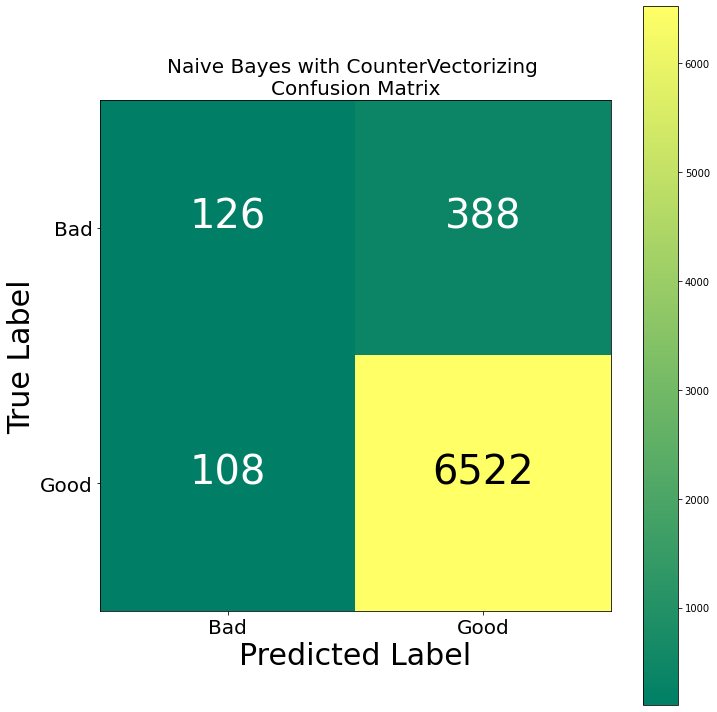

In [26]:
# Print confusion matrix for naive bayes with countVectorizer
show_confusion_matrix(cv_nb_y_pred, "Naive Bayes")

### XGBoost with CountVectorizer

In [27]:
from xgboost import XGBClassifier
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier())

# Assign y_pred to a variable for further process
cv_xgb_y_pred = y_pred

f1 score: 0.9159977886725732


**Classification Report**

In [28]:
# Compute and print the classification report
print(classification_report(y_test, cv_xgb_y_pred))

              precision    recall  f1-score   support

           0       0.64      0.18      0.28       514
           1       0.94      0.99      0.97      6630

    accuracy                           0.93      7144
   macro avg       0.79      0.59      0.62      7144
weighted avg       0.92      0.93      0.92      7144



**Confusion Matrix**

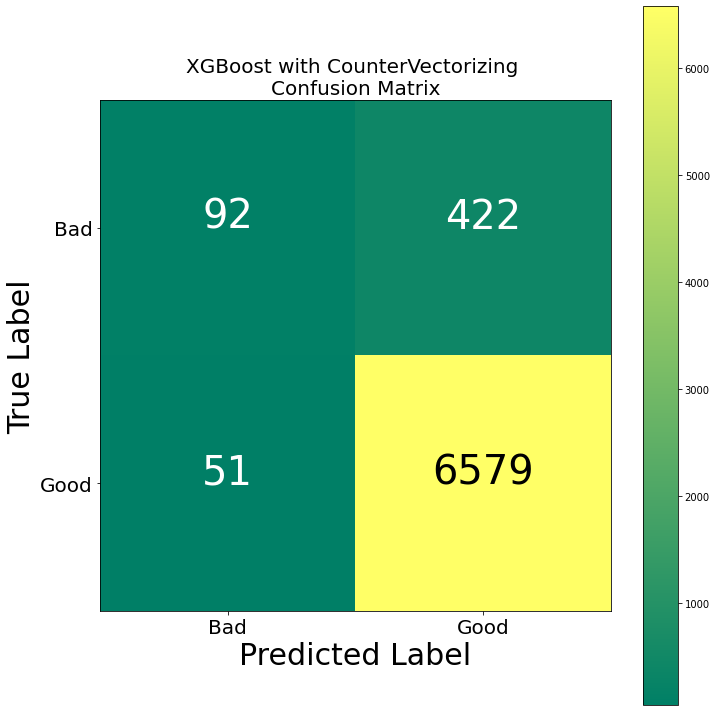

In [29]:
# Print confusion matrix for gradient boosting with countVectorizer
show_confusion_matrix(cv_xgb_y_pred, "XGBoost")

### CatBoost with CountVectorizer

In [30]:
# Call the modeling function for CatBoost with countvectorizer and print f1 score
from catboost import CatBoostClassifier
modeling(CatBoostClassifier(iterations=1000, learning_rate=0.8, 
                            depth=2, loss_function='Logloss'))

# Assign y_pred to a variable for further process
cv_catboost_y_pred = y_pred

0:	learn: 0.2721302	total: 208ms	remaining: 3m 27s
1:	learn: 0.2459839	total: 252ms	remaining: 2m 5s
2:	learn: 0.2402546	total: 291ms	remaining: 1m 36s
3:	learn: 0.2334826	total: 333ms	remaining: 1m 22s
4:	learn: 0.2308077	total: 378ms	remaining: 1m 15s
5:	learn: 0.2267610	total: 419ms	remaining: 1m 9s
6:	learn: 0.2229732	total: 459ms	remaining: 1m 5s
7:	learn: 0.2208235	total: 499ms	remaining: 1m 1s
8:	learn: 0.2179457	total: 540ms	remaining: 59.5s
9:	learn: 0.2165156	total: 582ms	remaining: 57.6s
10:	learn: 0.2156785	total: 623ms	remaining: 56s
11:	learn: 0.2146048	total: 663ms	remaining: 54.6s
12:	learn: 0.2125255	total: 702ms	remaining: 53.3s
13:	learn: 0.2100726	total: 742ms	remaining: 52.2s
14:	learn: 0.2088105	total: 781ms	remaining: 51.3s
15:	learn: 0.2070376	total: 818ms	remaining: 50.3s
16:	learn: 0.2060064	total: 859ms	remaining: 49.7s
17:	learn: 0.2052306	total: 899ms	remaining: 49s
18:	learn: 0.2040887	total: 938ms	remaining: 48.5s
19:	learn: 0.2031030	total: 978ms	remaini

**Classification Report**

In [31]:
# Compute and print the classification report
print(classification_report(y_test, cv_catboost_y_pred))

              precision    recall  f1-score   support

           0       0.52      0.24      0.33       514
           1       0.94      0.98      0.96      6630

    accuracy                           0.93      7144
   macro avg       0.73      0.61      0.64      7144
weighted avg       0.91      0.93      0.92      7144



**Confusion Matrix**

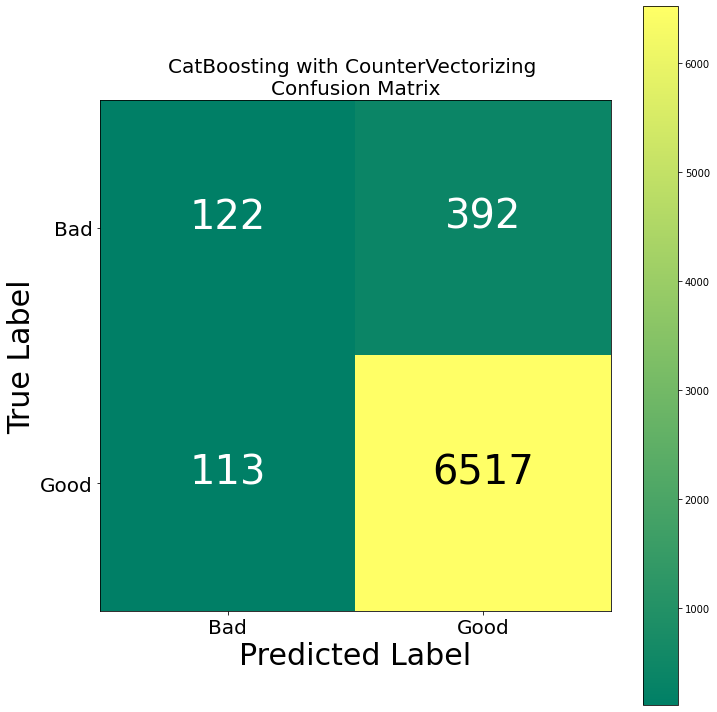

In [32]:
# Print confusion matrix for CatBoost with countVectorizer
show_confusion_matrix(cv_catboost_y_pred, "CatBoosting")

### Comparison of Models with CountVectorizer

**Function for f1 Score Plotting**

In [35]:
def bar_plot_f1_score(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

**Algorithms Comparison with CountVectorizer**

In [36]:
comparison_table(y_preds = [cv_logreg_y_pred, cv_rf_y_pred, cv_nb_y_pred, cv_xgb_y_pred, cv_catboost_y_pred], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [37]:
df_tv2

precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.893197 bad       0.367975  0.675097  0.476321   
                                  good      0.973069  0.910106  0.940535   
                                  average   0.929533  0.893197  0.907135   
           Random Forest 0.928891 bad       1.000000  0.011673  0.023077   
                                  good      0.928832  1.000000  0.963103   
                                  average   0.933952  0.928891  0.895469   
           Naive Bayes   0.930571 bad       0.538462  0.245136  0.336898   
                                  good      0.943849  0.983710  0.963368   
                                  average   0.914682  0.930571  0.918294   
           XGBoost       0.933791 bad       0.643357  0.178988  0.280061   
                                  good      0.939723  0.992308  0.965300   
                                  average   0.918400  0.933791  0.915998   
           CatBoost      0.929311 bad       0.519149  0.237354  0.325768   
                                  good      0.943262  0.982956  0.962700   
                                  average   0.912748  0.929311  0.916874   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.893197 bad        514.0  
                                  good      6630.0  
                                  average   7144.0  
           Random Forest 0.928891 bad        514.0  
                                  good      6630.0  
                                  average   7144.0  
           Naive Bayes   0.930571 bad        514.0  
                                  good      6630.0  
                                  average   7144.0  
           XGBoost       0.933791 bad        514.0  
                                  good      6630.0  
                                  average   7144.0  
           CatBoost      0.929311 bad        514.0  
                                  good      6630.0  
                                  average   7144.0

**Average f1 Score - Models with CountVectorizer**

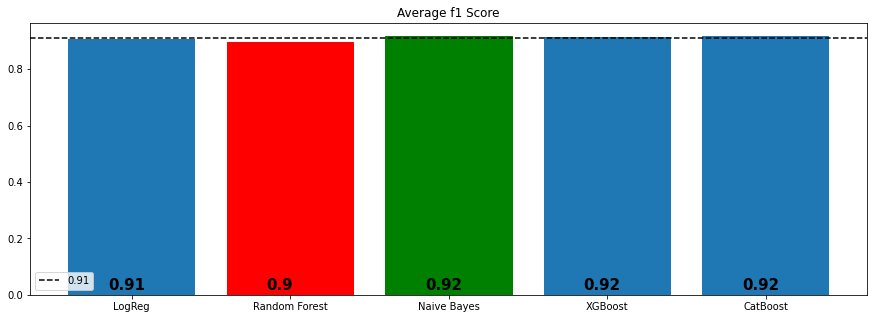

In [38]:
# Plotting f1 score with "bar_plot_f1_score" function
bar_plot_f1_score(df=df_tv, category='average', title= "Average f1 Score")

## TF-IDF 

In order to help our model focus more on meaningful words, we can use a TF-IDF score (Term Frequency, Inverse Document Frequency) on top of our Bag of Words model. TF-IDF weighs words by how rare they are in our dataset, discounting words that are too frequent and just add to the noise.

In [39]:
# Create the word vector with TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

### Logistic Regression with TF-IDF

In [40]:
# Call the modeling function for logistic regression with TF-IDF and print f1 score
from sklearn.linear_model import LogisticRegression
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
tfidf_logreg_y_pred = y_pred

f1 score: 0.8754547211690559


**Classification Report**

In [41]:
# Compute and print the classification report
print(classification_report(y_test, tfidf_logreg_y_pred))

              precision    recall  f1-score   support

           0       0.29      0.83      0.43       514
           1       0.98      0.85      0.91      6630

    accuracy                           0.84      7144
   macro avg       0.64      0.84      0.67      7144
weighted avg       0.94      0.84      0.88      7144



**Confusion Matrix**

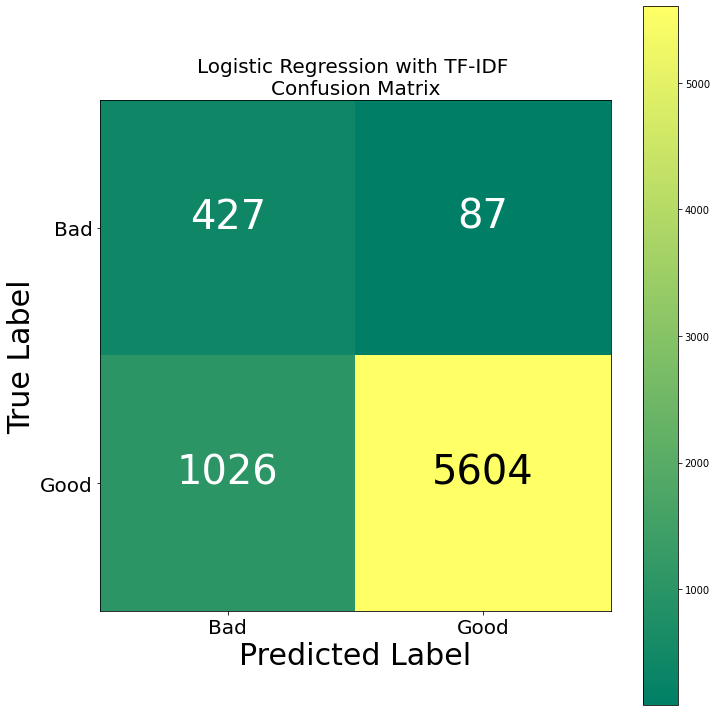

In [42]:
# Print confusion matrix for logistic regression with TF-IDF
show_confusion_matrix(tfidf_logreg_y_pred, "Logistic Regression", "TF-IDF")

### Random Forest with TF-IDF

In [43]:
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
tfidf_rf_y_pred = y_pred

f1 score: 0.8934197071230328


**Classification Report**

In [44]:
# Compute and print the classification report
print(classification_report(y_test, tfidf_rf_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       514
           1       0.93      1.00      0.96      6630

    accuracy                           0.93      7144
   macro avg       0.46      0.50      0.48      7144
weighted avg       0.86      0.93      0.89      7144



**Confusion Matrix**

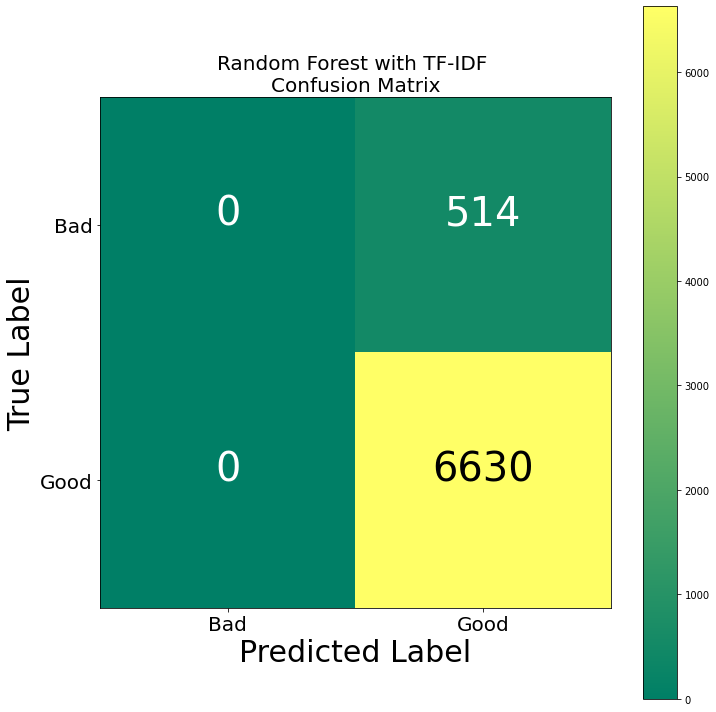

In [45]:
# Print confusion matrix for random forest classifier with TF-IDF
show_confusion_matrix(tfidf_rf_y_pred, "Random Forest", "TF-IDF")

### Naive Bayes with TF-IDF

In [46]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score

modeling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
tfidf_nb_y_pred = y_pred

f1 score: 0.8934197071230328


**Classification Report**

In [47]:
# Compute and print the classification report
print(classification_report(y_test, tfidf_nb_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       514
           1       0.93      1.00      0.96      6630

    accuracy                           0.93      7144
   macro avg       0.46      0.50      0.48      7144
weighted avg       0.86      0.93      0.89      7144



**Confusion Matrix**

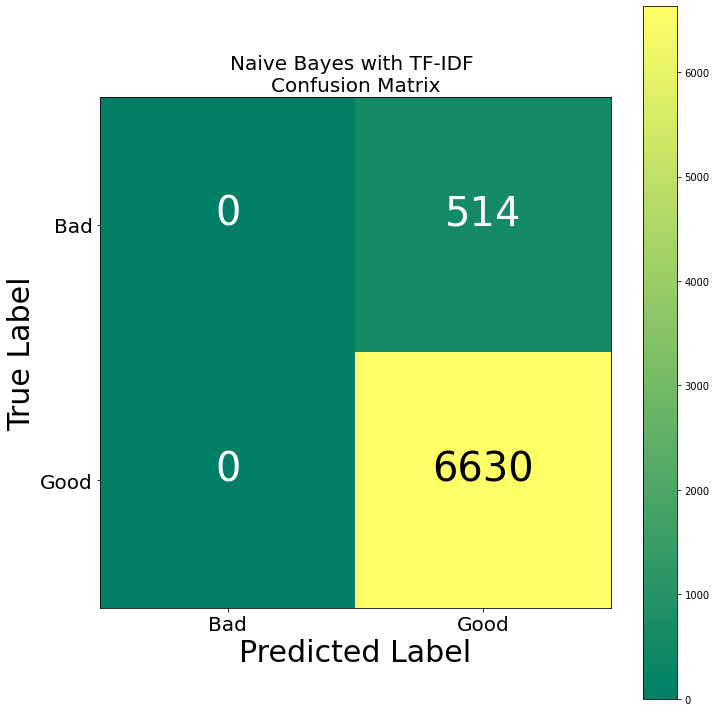

In [48]:
# Print confusion matrix for naive bayes with TF-IDF
show_confusion_matrix(tfidf_nb_y_pred, "Naive Bayes", "TF-IDF")

### XGBoost with TF-IDF

In [49]:
# Call the modeling function for XGBoost with TF-IDF and print f1 score
modeling(XGBClassifier(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
tfidf_xgb_y_pred = y_pred

f1 score: 0.9164523722228217


**Classification Report**

In [50]:
# Compute and print the classification report
print(classification_report(y_test, tfidf_xgb_y_pred))

              precision    recall  f1-score   support

           0       0.64      0.18      0.29       514
           1       0.94      0.99      0.97      6630

    accuracy                           0.93      7144
   macro avg       0.79      0.59      0.63      7144
weighted avg       0.92      0.93      0.92      7144



**Confusion Matrix**

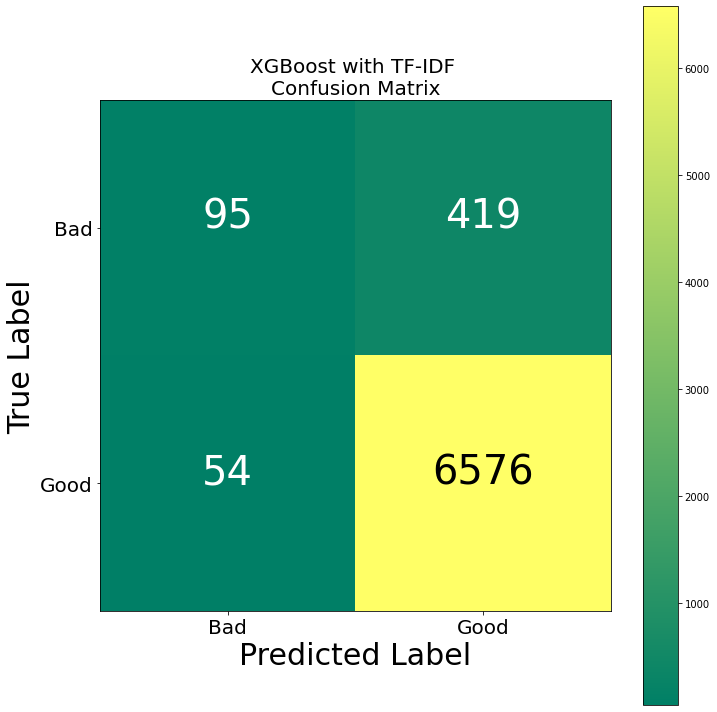

In [51]:
# Print confusion matrix for XGBoost with TF-IDF
show_confusion_matrix(tfidf_xgb_y_pred, "XGBoost", "TF-IDF")

### Catboost with TF-IDF

In [52]:
# Call the modeling function for Catboost with TF-IDF and print f1 score
modeling(CatBoostClassifier(iterations=1500, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
tfidf_catboost_y_pred = y_pred

0:	learn: 0.2718136	total: 99ms	remaining: 2m 28s
1:	learn: 0.2489611	total: 156ms	remaining: 1m 56s
2:	learn: 0.2432731	total: 208ms	remaining: 1m 43s
3:	learn: 0.2332378	total: 260ms	remaining: 1m 37s
4:	learn: 0.2311042	total: 312ms	remaining: 1m 33s
5:	learn: 0.2262468	total: 365ms	remaining: 1m 30s
6:	learn: 0.2232532	total: 419ms	remaining: 1m 29s
7:	learn: 0.2208350	total: 472ms	remaining: 1m 27s
8:	learn: 0.2197236	total: 524ms	remaining: 1m 26s
9:	learn: 0.2162057	total: 578ms	remaining: 1m 26s
10:	learn: 0.2146500	total: 632ms	remaining: 1m 25s
11:	learn: 0.2123156	total: 683ms	remaining: 1m 24s
12:	learn: 0.2112943	total: 734ms	remaining: 1m 23s
13:	learn: 0.2096995	total: 787ms	remaining: 1m 23s
14:	learn: 0.2068539	total: 840ms	remaining: 1m 23s
15:	learn: 0.2055910	total: 903ms	remaining: 1m 23s
16:	learn: 0.2044816	total: 954ms	remaining: 1m 23s
17:	learn: 0.2036154	total: 1.01s	remaining: 1m 23s
18:	learn: 0.2020640	total: 1.06s	remaining: 1m 22s
19:	learn: 0.1999388	to

**Classification Report**

In [53]:
# Compute and print the classification report
print(classification_report(y_test, tfidf_catboost_y_pred))

              precision    recall  f1-score   support

           0       0.51      0.23      0.32       514
           1       0.94      0.98      0.96      6630

    accuracy                           0.93      7144
   macro avg       0.73      0.61      0.64      7144
weighted avg       0.91      0.93      0.92      7144



**Confusion Matrix**

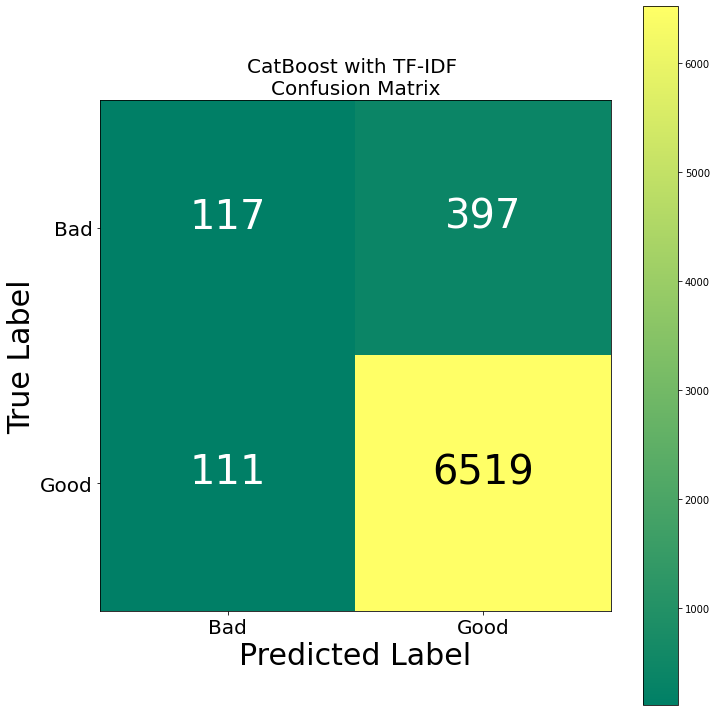

In [54]:
# Print confusion matrix for CatBoost with TF-IDF
show_confusion_matrix(tfidf_catboost_y_pred, "CatBoost", "TF-IDF")

### Comparision of Models with TF-IDF Vectorizer

In [55]:
comparison_table(y_preds = [tfidf_logreg_y_pred, tfidf_rf_y_pred, tfidf_nb_y_pred, tfidf_xgb_y_pred, tfidf_catboost_y_pred], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

**Comparison Table - TF-IDF Vectorizing**

In [56]:
# Print the comparision matrix
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2


Comparision Matrix of Models with TF-IDF Vectorizer



precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.844205 bad       0.293875  0.830739  0.434164   
                                  good      0.984713  0.845249  0.909666   
                                  average   0.935008  0.844205  0.875455   
           Random Forest 0.928052 bad       0.000000  0.000000  0.000000   
                                  good      0.928052  1.000000  0.962683   
                                  average   0.861280  0.928052  0.893420   
           Naive Bayes   0.928052 bad       0.000000  0.000000  0.000000   
                                  good      0.928052  1.000000  0.962683   
                                  average   0.861280  0.928052  0.893420   
           XGBoost       0.933791 bad       0.637584  0.184825  0.286576   
                                  good      0.940100  0.991855  0.965284   
                                  average   0.918334  0.933791  0.916452   
           CatBoost      0.928891 bad       0.513158  0.227626  0.315364   
                                  good      0.942597  0.983258  0.962498   
                                  average   0.911699  0.928891  0.915938   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.844205 bad        514.0  
                                  good      6630.0  
                                  average   7144.0  
           Random Forest 0.928052 bad        514.0  
                                  good      6630.0  
                                  average   7144.0  
           Naive Bayes   0.928052 bad        514.0  
                                  good      6630.0  
                                  average   7144.0  
           XGBoost       0.933791 bad        514.0  
                                  good      6630.0  
                                  average   7144.0  
           CatBoost      0.928891 bad        514.0  
                                  good      6630.0  
                                  average   7144.0

**Average f1 score - Models with TF-IDF Vectorizer**

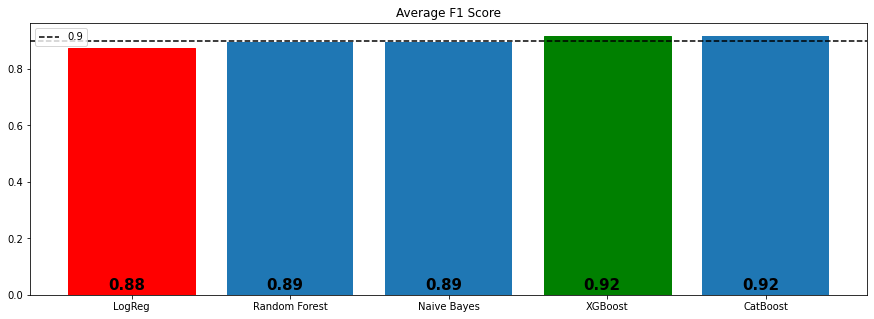

In [57]:
# Plotting f1 score with "bar_plot_f1_score" function
bar_plot_f1_score(df=df_tv, category='average', title= "Average F1 Score")